# 배경
(1) 최대한 다양한 요소들을 분석해서 그 교집합이 큰 기업 선정 <br><br>
(2) 기존 유니콘 기업을 선정하는 기준(기업가치 1조 이상, 설립일 10년 이하의 비상장스타트업)으로는 X <br><br>
(3) 성장률(추이)을 주의 깊게 봐야함 (직원 대비 매출액 등)<br><br>
(4) 변수들 조합하여 새로운 feature 생성 필요<br><br>
(5) 자체적인 기준을 정하고 그 기준에 부합하는 기업들을 걸러내야 함

## 연매출 단위: 천 원!

# 유니콘(or 예비 유니콘)기업에 대한 자체적인 정의

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

# Data Load

In [3]:
df = pd.read_csv('./company_nps_data.csv', encoding='cp949')
print(df.shape)
df.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [4]:
display(df.isnull().any())
display(df.info())

회사ID        False
연매출액        False
년도          False
월           False
월별_연금보험료    False
월별_직원수      False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


None

* 결측치 없음

In [5]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


* 월별 연금보험료와 월별 직원수가 0인 회사 존재
* 연매출액이 **마이너스**인 회사도 존재

In [6]:
df['회사ID'].value_counts().loc[df['회사ID'].value_counts() > 1]

250472    50
404192    50
128174    50
395238    50
135668    50
          ..
440265     2
414997     2
367893     2
409839     2
367252     2
Name: 회사ID, Length: 4961, dtype: int64

In [7]:
print(df['년도'].min())
print(df['년도'].max())

2015
2019


In [8]:
df['회사ID'].nunique()

5000

* 중복 제외 회사 개수: 5000개

### 유니콘 기업 : 비상장 스타트업 중 창업 10년 이내 기업가치 1조원 달성한 기업
* 글로벌 유니콘 기업은 전년도 매출액 대비 평균 약 267배로 기업가치를 평가받고 있다.(국내는 좀 다름)
* 주어진 데이터(2015~2019): 연매출액, 월별 연금보험료, 월별 직원수
* 기업가치는 매출이나 영업이익을 어느 정도 반영하지만, 매출과 비례하지는 않는다.
(https://chloe-ki.tistory.com/entry/%ED%95%9C%EA%B5%AD-%EC%9C%A0%EB%8B%88%EC%BD%98-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%97%85-%EB%A7%A4%EC%B6%9C-%EC%88%9C%EC%9C%84-2020)
* 한국 유니콘 기업 수는 2019년 기준 △비바리퍼블리카 △야놀자 △엘앤피코스메틱 △옐로모바일 △우아한형제들 △위메프 △크래프톤 △쿠팡 △지피클럽 등 총 9개
* 2021 한국 유니콘 기업 리스트 및 현황(https://better-together.tistory.com/191)
* 국내 유니콘 기업들의 연매출은 기업마다 천차만별 (2019년 기준 최소 연매출 유니콘 기업 279억~최대 연매출 기업 7조 1530억)이므로 매출만으로 판단할 수 없지만, 일반적으로 1000억 이상의 연매출을 보인다.
<br><Br>
    
### 분석 방향성 (아직 고민 중...)
(1) 연매출액 추이 및 성장률 <br>
(ex. 연매출액이 꾸준히 증가하면서 연매출액이 1000억 이상인 기업들을 일단 추려내면 좋을 것 같습니다. --> X)<br>
--> 현재 제공받은 데이터에서 연매출액 max값은 113억입니다. 따라서, 기존의 유니콘 기업들의 연매출(일반적으로 1000억 원 이상) 기준을 적용하면 안됨 --> 자체적으로 유니콘 기업에 대한 정의 필요<br>
(2) 월별 연금보험료 추이 및 증감률<br>
(3) 월별 직원수 추이 및 증감률<br><br>

### 5/3 추가
* 신용보증기금은 2019년부터 작년까지 네 차례에 걸쳐 총 22개 혁신아이콘(차세대유니콘기업)을 선정했으며, 전담 조직인 지식재산금융센터를 통해 총 1천910억원의 신용보증한도를 제공하고 해외진출, 법률·노무컨설팅, 잡매칭 등 13건의 맞춤형 비금융서비스를 지원했다.
<br>**이를 통해 혁신아이콘 기업은 전년 동기 대비 73.0%의 매출 성장과 59.7% 고용 증가를 달성했으며, 1천765억원의 민간 후속 투자를 유치했다고 신보는 전했다.**
<br>(참고자료: https://www.yna.co.kr/view/AKR20210217050200002)
* 유니콘 기업들, 예비 유니콘 기업들이라 불리는 기업들의 19년 대비 20년 매출 상승률은 '대부분' 50% 이상을 보였음 
<br>(참고자료: https://brunch.co.kr/@digitalnative/23)
<br><br>
### 참고 링크

* https://www.newspim.com/news/view/20201217000275
* http://www.kocam.org/?p=18892
* https://www.mk.co.kr/news/economy/view/2020/01/78782/

# EDA

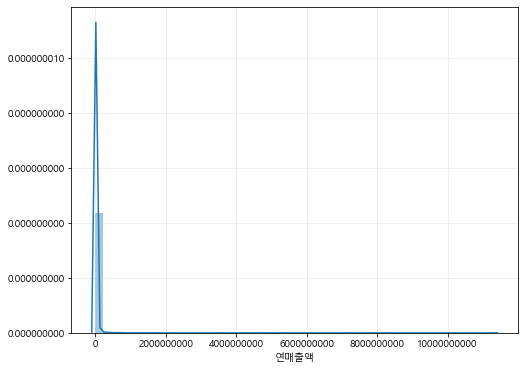

In [9]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(df['연매출액'])
plt.grid(color='lightgrey', alpha=0.43)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

## 연매출 분포

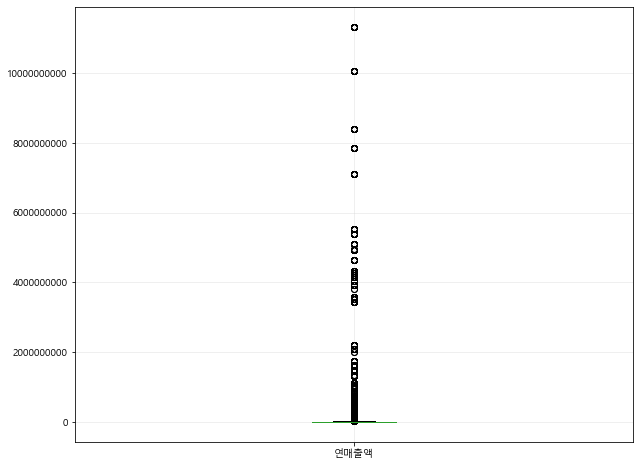

In [10]:
ax = df['연매출액'].plot(kind='box',
               figsize=(10, 8))
plt.grid(color='lightgrey', alpha=0.43)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [11]:
print(df['연매출액'].min())
print(df['연매출액'].max())

-7882176
11328779396


* 연매출액 최솟값: -788만
* 연매출액 최댓값: 113억

In [12]:
df['연매출액'].loc[df['연매출액'] >= 10000000000].unique()

array([10058868796, 11328779396], dtype=int64)

In [13]:
df.loc[(df['연매출액']==10058868796) | (df['연매출액']==11328779396)]

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
6086,419945,10058868796,2019,12,952530380,2872
6449,63,11328779396,2018,6,401083100,1011
13109,419945,10058868796,2019,4,870665760,2765
23302,63,11328779396,2018,7,418169080,1009
23648,63,11328779396,2018,10,414503020,996
25614,419945,10058868796,2019,7,928921380,2762
28110,63,11328779396,2018,5,400339640,1002
33039,63,11328779396,2018,1,403119840,1006
35822,419945,10058868796,2019,11,952045040,2870
52606,63,11328779396,2018,8,418292620,1011


* 연매출액 10조원 이상 기업 : 2곳(63, 419945)<br>
* 63회사는 2018년 데이터만, 419945회사는 2019년 데이터만 존재 

In [14]:
df['연매출액'].loc[df['연매출액'] >= 10000000000].sort_values(ascending=False)

98243    11328779396
23302    11328779396
23648    11328779396
28110    11328779396
33039    11328779396
80947    11328779396
52606    11328779396
80770    11328779396
53569    11328779396
6449     11328779396
79358    11328779396
74251    11328779396
72938    10058868796
89842    10058868796
88487    10058868796
6086     10058868796
71565    10058868796
70918    10058868796
64436    10058868796
53151    10058868796
35822    10058868796
25614    10058868796
13109    10058868796
60354    10058868796
Name: 연매출액, dtype: int64

## 연매출 관련

In [15]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


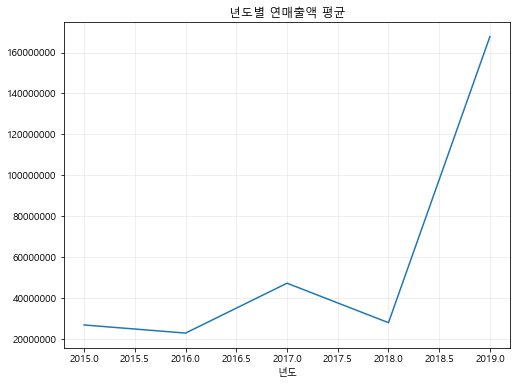

In [16]:
df_sales = df[['회사ID', '연매출액', '년도', '월']]
ax = df_sales.groupby(['년도'])['연매출액'].mean().plot(kind='line', figsize=(8, 6))
plt.title('년도별 연매출액 평균')
plt.grid(color='lightgrey', alpha=0.43)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [17]:
df_sales.head()

,회사ID,연매출액,년도,월
0,233757,41688077,2018,7
1,123464,1760695,2018,3
2,342124,3221341,2018,7
3,386420,4815584,2015,11
4,129243,9799736,2018,10


In [18]:
df_sales['Date'] = pd.to_datetime(df_sales['년도'].astype(str) + df_sales['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
df_sales.head()

,회사ID,연매출액,년도,월,Date
0,233757,41688077,2018,7,2018/07
1,123464,1760695,2018,3,2018/03
2,342124,3221341,2018,7,2018/07
3,386420,4815584,2015,11,2015/11
4,129243,9799736,2018,10,2018/10


In [147]:
# from datetime import datetime
# df_sales['Date2'] = df_sales['Date'].apply(lambda x: datetime.strptime(x, '%Y/%m'))
# df_sales.head()

In [19]:
df_sales.set_index('Date').sort_index(ascending=True)

,회사ID,연매출액,년도,월
Date,,,,
2015/11,391439,2465042,2015,11
2015/11,381560,10314403,2015,11
2015/11,305317,12271715,2015,11
2015/11,301480,8353896,2015,11
2015/11,242049,2586419,2015,11
...,...,...,...,...
2019/12,258745,775720,2019,12
2019/12,254479,2269625,2019,12
2019/12,401386,1512330,2019,12


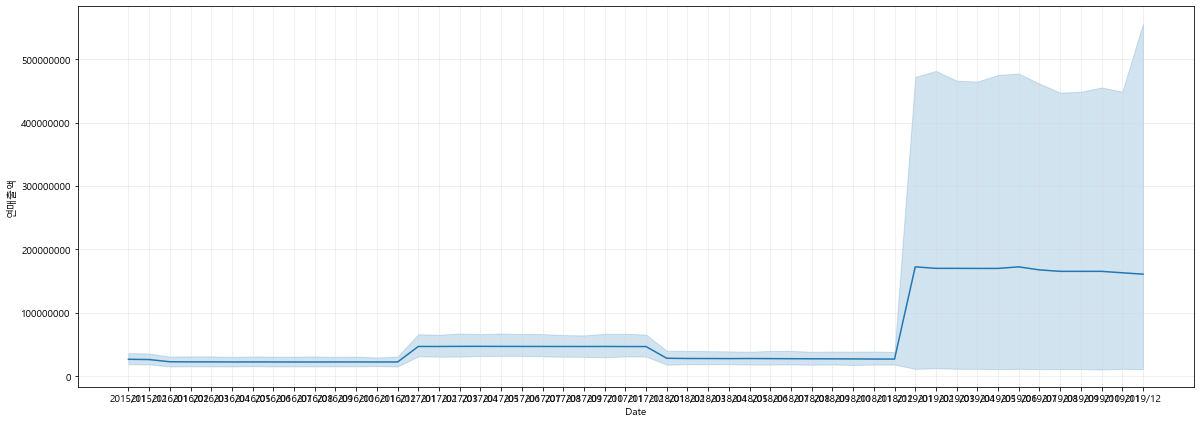

In [20]:
plt.figure(figsize=(20, 7))
ax = sns.lineplot(data=df_sales, x='Date', y='연매출액')
plt.grid(color='lightgrey', alpha=0.45)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [21]:
pd.set_option('display.max_rows', None)
df_sales2 = df_sales.pivot_table(index=['회사ID', '년도'],
                                 values='연매출액').unstack()
print(df_sales2.shape)
df_sales2.head()

(5000, 5)


연매출액                              
년도   2015 2016 2017           2018 2019
회사ID                                   
63    NaN  NaN  NaN 11328779396.00  NaN
95    NaN  NaN  NaN   656947437.00  NaN
102   NaN  NaN  NaN   742658938.00  NaN
295   NaN  NaN  NaN    83776697.00  NaN
414   NaN  NaN  NaN    19732769.00  NaN

## 월별 연금보험료 관련

In [22]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


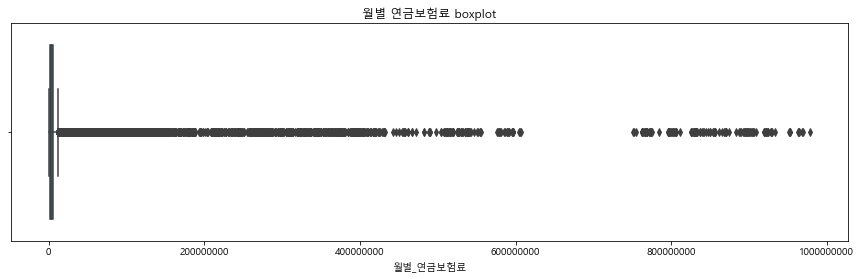

In [23]:
plt.figure(figsize=(15, 4))
ax = sns.boxplot(data=df, x='월별_연금보험료')
ax.set_title('월별 연금보험료 boxplot')
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [24]:
print(df['월별_연금보험료'].min())
print(df['월별_연금보험료'].max())

0
978067260


* 월별 연금보험료 최솟값 : 0원
* 월별 연금보험료 최댓값 : 약 9억 7천만

In [25]:
df['월별_연금보험료'].value_counts().sort_index(ascending=False)

978067260     1
969234340     1
967961440     1
964790780     1
964616500     1
963694640     1
953121400     1
952530380     1
952045040     1
933819300     1
929753720     1
928921380     1
928650860     1
928391020     1
927833840     1
924522740     1
924398280     1
922866000     1
922457260     1
922313880     1
921771480     1
921162260     1
918900560     1
918867780     1
908590640     1
906576960     1
904966060     1
904608380     1
903369000     1
903033760     1
901083660     1
899715340     1
899165520     1
898976400     1
897214080     1
896945960     1
896220280     1
895254420     1
894914160     1
894677580     1
893216520     1
892948080     1
890106300     1
888827440     1
886982420     1
883935720     1
874397000     1
870767520     1
870665760     1
870631680     1
869359960     1
867816240     1
865599660     1
861583380     1
856972320     1
856599760     1
855993660     1
855216040     1
854059880     1
853245160     1
850259400     1
849859200     1
84800132

In [26]:
df.loc[df['월별_연금보험료'] == 0, '회사ID'].unique()

array([478999, 568445, 288014, 550603, 439536, 602137, 291968, 277054,
       472629, 157237, 217292], dtype=int64)

* 월별 연금보험료가 0인 기업(중복은 1회로 count) : 11개

## 월별 직원수 관련

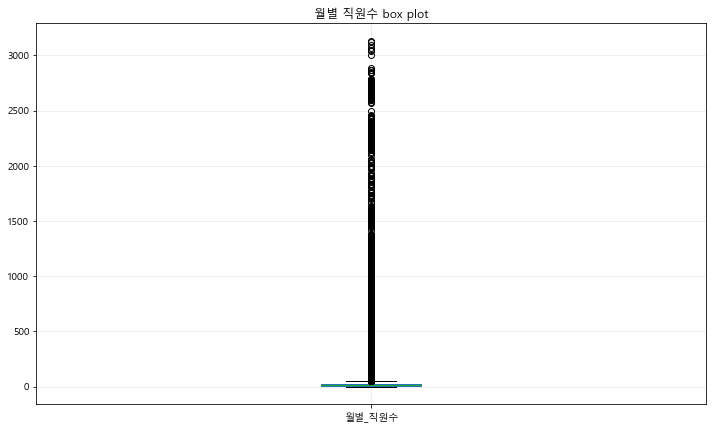

In [27]:
df['월별_직원수'].plot(kind='box', figsize=(12, 7))
plt.title('월별 직원수 box plot')
plt.grid(color='lightgrey', alpha=0.43)

In [28]:
df['월별_직원수'].value_counts().sort_index()

0         13
3       6939
4       8322
5       7302
6       7227
7       6277
8       5092
9       4562
10      3976
11      3354
12      2900
13      2559
14      2335
15      2158
16      1935
17      1692
18      1480
19      1372
20      1193
21      1171
22      1114
23      1202
24      1083
25       961
26       840
27       716
28       650
29       531
30       620
31       583
32       598
33       576
34       522
35       445
36       467
37       413
38       388
39       437
40       462
41       382
42       410
43       349
44       340
45       318
46       266
47       284
48       254
49       236
50       242
51       223
52       227
53       192
54       197
55       184
56       179
57       140
58       148
59       176
60       177
61       235
62       217
63       187
64       189
65       168
66       155
67       164
68       147
69       170
70       145
71       121
72       142
73       150
74       125
75       124
76       125
77       108
78       128

In [29]:
# df['월별_직원수'].value_counts().loc[df['월별_직원수'].value_counts().values <= 10]

In [30]:
df.loc[df['월별_직원수']<10, '회사ID'].nunique()

3178

* 월별 직원수 10명 이하인 곳(중복은 1회로 count): 3178개

## 산점도

### 월별 연금보험료 & 월별 직원수

In [31]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


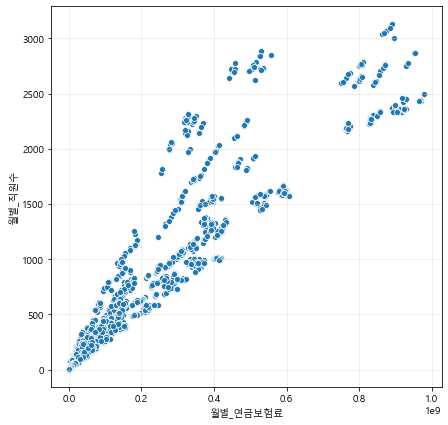

In [32]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='월별_연금보험료', y='월별_직원수')
plt.grid(color='lightgrey', alpha=0.45)

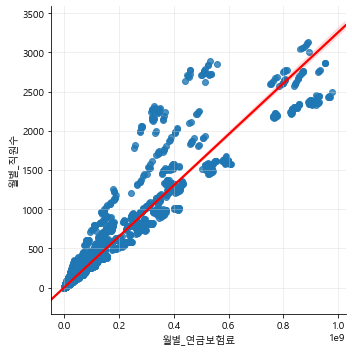

In [33]:
sns.lmplot(x="월별_연금보험료", y="월별_직원수", data=df, line_kws={'color':"red"})
plt.grid(color='lightgray', alpha=0.45)

In [34]:
df[['월별_연금보험료', '월별_직원수']].corr()

,월별_연금보험료,월별_직원수
월별_연금보험료,1.00,0.96
월별_직원수,0.96,1.00


<AxesSubplot:>

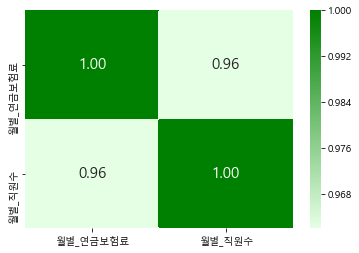

In [35]:
cm = sns.light_palette('green', as_cmap=True) 
sns.heatmap(data=df[['월별_연금보험료', '월별_직원수']].corr(),
           annot=True,
           fmt='.2f',
           annot_kws={'size':15},
           cmap=cm)

* 월별 연금보험료와 월별 직원수 간에는 매우 강한 양의 상관관계 --> 당연한 결과

In [36]:
# 년도, 월 순서대로 정렬 --> data
data = df.sort_values(by=['년도', '월'], ascending=True).copy()
print(data.shape)
data.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
3,386420,4815584,2015,11,3795900,14
93,145900,4753036,2015,11,4153140,25
97,139359,50216484,2015,11,10547240,39
193,135634,13168146,2015,11,10895560,44
327,190720,3680361,2015,11,945900,4


## 증감률

### 회사별 연매출액 증감률
#### 2018년 대비 2019년 증감률

In [37]:
data.loc[data['회사ID'] == 414].tail()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
17864,414,19732769,2018,8,81070500,248
18836,414,19732769,2018,9,80722840,248
84753,414,19732769,2018,10,80146840,248
30976,414,19732769,2018,11,81066640,251
24734,414,19732769,2018,12,79522000,246


In [38]:
data1 = data.set_index('회사ID')
data1.sort_index(inplace=True)
data1['Date'] = pd.to_datetime(data1['년도'].astype(str) + data1['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
data1.head()

,연매출액,년도,월,월별_연금보험료,월별_직원수,Date
회사ID,,,,,,
63,11328779396,2018,1,403119840,1006,2018/01
63,11328779396,2018,7,418169080,1009,2018/07
63,11328779396,2018,2,406770960,1018,2018/02
63,11328779396,2018,3,404826240,1013,2018/03
63,11328779396,2018,8,418292620,1011,2018/08


In [39]:
data_year = pd.pivot_table(data=data1,
              index='회사ID',
              columns='년도',
               values='연매출액')
data_year_18_19 = data_year[[2018, 2019]]
data_year_18_19.head()

년도,2018,2019
회사ID,,
63,11328779396.00,NaN
95,656947437.00,NaN
102,742658938.00,NaN
295,83776697.00,NaN
414,19732769.00,NaN


**결측치 처리, How?**

In [40]:
data_year_18_19.T.fillna(method='pad')
data_year_18_19.T.fillna(method='bfill')

회사ID,63,95,102,295,414,597,786,917,1052,1125,...,1065828,1949405,1983879,2256869,2329349,2400284,2437574,2693684,3312354,5159723
년도,,,,,,,,,,,,,,,,,,,,,
2018,11328779396.00,656947437.00,742658938.00,83776697.00,19732769.00,208141595.00,65514573.00,42843708.00,1215784.00,53713870.00,...,8108413.00,1033800.00,632516.00,275162.00,1314405.00,1263406.00,214016.00,238076.00,1451563.00,2591898.00
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238076.00,1451563.00,2591898.00


In [41]:
# 2019년 연매출 데이터 있는 경우
len(data_year_18_19[2019].loc[data_year_18_19[2019].notnull()])

74

**결측치는 일단 drop하기로**

In [42]:
data_year_18_19.dropna(inplace=True)
data_year_18_19['rate'] = ((data_year_18_19[2019] - data_year_18_19[2018]) / data_year_18_19[2018]) * 100
data_year_18_19

년도,2018,2019,rate
회사ID,,,
14271,8388401.00,9039340.00,7.76
128174,84777341.00,105847542.00,24.85
130261,15452289.00,15498542.00,0.30
130756,16664338.00,3600374.00,-78.39
131998,29757853.00,28298862.00,-4.90
134575,16110817.00,16492369.00,2.37
135668,23521557.00,20471120.00,-12.97
138077,25711081.00,29041712.00,12.95
139442,11386373.00,25645141.00,125.23


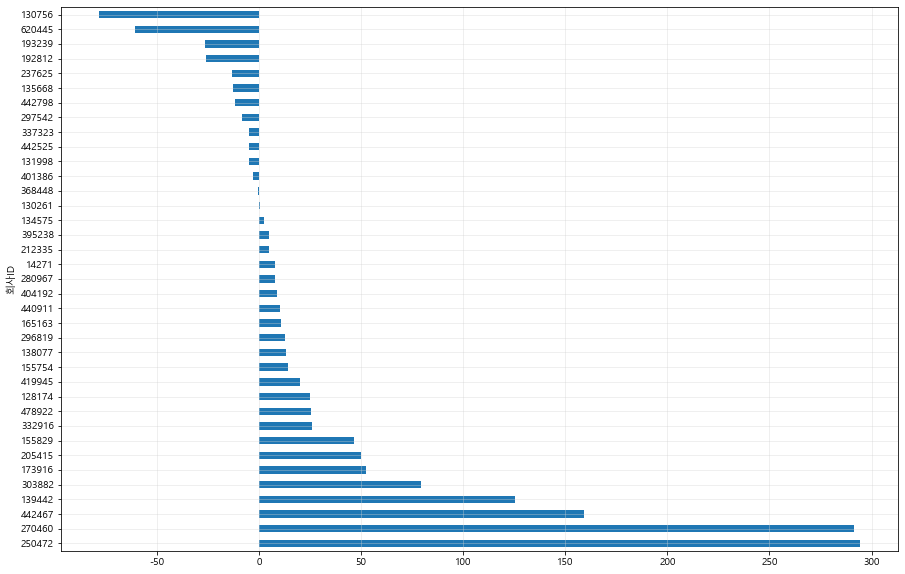

In [43]:
ax = data_year_18_19['rate'].T.sort_values(ascending=False).plot(kind='barh', figsize=(15, 10), legend=False)
# ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.45)

#### 2018년 대비 2019년 연매출 성장률 50% 이상인 기업

In [44]:
print(len(data_year_18_19.loc[data_year_18_19['rate'] >= 50]))
data_year_18_19.loc[data_year_18_19['rate'] >= 50].sort_values(by='rate', ascending=False)

6


년도,2018,2019,rate
회사ID,,,
250472,3226813.00,12724602.00,294.34
270460,1960000.00,7670000.00,291.33
442467,17003119.00,44059030.00,159.12
139442,11386373.00,25645141.00,125.23
303882,11025903.00,19778625.00,79.38
173916,2495778.00,3801046.00,52.30


* 250472, 270460, 442467, 139442, 303882, 173916 : **18년 대비 19년 연매출 50%이상 상승**

# 1차 EDA 결론
### (1) 연매출 외에도 월 연금보험료와 월 직원수 컬럼의 증감률을 확인하고
### (2) 자체적으로 기준을 설정한 다음, 그 기준에 맞는 기업들을 확인해봐야함
### (3) 또한, 절대적 수치에 의존해서는 안되지만 연매출이 마이너스이거나 직원수가 한 자리수이거나 월 연금보험료가 0원인, 유니콘 기업으로서의 가능성이 없는 기업들은 1차적으로 소거하고 분석을 진행하는 것이 좋을 것으로 보임
### (4) 18년 대비 19년 연매출 50%이상 상승한 기업은 총 6곳.
#### 왜 연매출 50%이상 성장한 기업을 본 것인가? 
#### --> 유니콘 기업들, 예비 유니콘 기업들이라 불리는 기업들의 19년 대비 20년 매출 상승률은 '대부분' 50% 이상을 보였음
<br> (참고자료: https://brunch.co.kr/@digitalnative/23)
### 변수들을 조합하여 새로운 피처 생성할 필요 있음

# new feature - 1인당 임금 변화율

팀원간 새로운 피처 하나씩 생성

**1인당 임금 변화율: 연금보험료/직원수**

## 월 임금변화율

In [45]:
data.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
3,386420,4815584,2015,11,3795900,14
93,145900,4753036,2015,11,4153140,25
97,139359,50216484,2015,11,10547240,39
193,135634,13168146,2015,11,10895560,44
327,190720,3680361,2015,11,945900,4


In [46]:
data['월연금보험료/월직원수'] = data['월별_연금보험료'] / data['월별_직원수']
data.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
3,386420,4815584,2015,11,3795900,14,271135.71
93,145900,4753036,2015,11,4153140,25,166125.60
97,139359,50216484,2015,11,10547240,39,270442.05
193,135634,13168146,2015,11,10895560,44,247626.36
327,190720,3680361,2015,11,945900,4,236475.00


In [47]:
data2 = data.copy()

In [48]:
data2['Date'] = pd.to_datetime(data2['년도'].astype(str) + data2['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
data2.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수,Date
3,386420,4815584,2015,11,3795900,14,271135.71,2015/11
93,145900,4753036,2015,11,4153140,25,166125.60,2015/11
97,139359,50216484,2015,11,10547240,39,270442.05,2015/11
193,135634,13168146,2015,11,10895560,44,247626.36,2015/11
327,190720,3680361,2015,11,945900,4,236475.00,2015/11


In [54]:
pd.set_option('display.max_columns', None)

In [56]:
# data3 = data2.pivot_table(index='회사ID', columns='Date', values='월연금보험료/월직원수')
# data3.head()

In [124]:
data3 = data2.pivot_table(index=['회사ID', 'Date'], values='월연금보험료/월직원수')
data3.head()

월연금보험료/월직원수
회사ID Date                
63   2018/01    400715.55
     2018/02    399578.55
     2018/03    399631.04
     2018/04    399418.77
     2018/05    399540.56

In [76]:
((data3.iloc[1] - data3.iloc[0]) / data3.iloc[0]) * 100

월연금보험료/월직원수   -0.28
dtype: float64

In [163]:
data3.head()

월연금보험료/월직원수      rate
회사ID Date                          
63   2018/01    400715.55 400715.55
     2018/02    399578.55     -0.28
     2018/03    399631.04      0.01
     2018/04    399418.77     -0.05
     2018/05    399540.56      0.03

In [178]:
data3['rate'] = data3['월연금보험료/월직원수'].copy()

for i in range(len(data3)):
    if i == 0:
        data3.iloc[i, 1] = 0
    elif data3.index[i][0] != data3.index[i-1][0]:  # 다른 회사, 처음 시작 연도
        data3.iloc[i, 1] = 0
    else:
        data3.iloc[i, 1] = ((data3.iloc[i, 0] - data3.iloc[i-1, 0]) / data3.iloc[i-1, 0]) * 100
        
data3.head(10)

월연금보험료/월직원수  rate
회사ID Date                      
63   2018/01    400715.55  0.00
     2018/02    399578.55 -0.28
     2018/03    399631.04  0.01
     2018/04    399418.77 -0.05
     2018/05    399540.56  0.03
     2018/06    396719.19 -0.71
     2018/07    414439.13  4.47
     2018/08    413741.46 -0.17
     2018/09    416603.26  0.69
     2018/10    416167.69 -0.10

In [179]:
data4 = data3.reset_index('Date')
data4.head()

,Date,월연금보험료/월직원수,rate
회사ID,,,
63,2018/01,400715.55,0.00
63,2018/02,399578.55,-0.28
63,2018/03,399631.04,0.01
63,2018/04,399418.77,-0.05
63,2018/05,399540.56,0.03


In [183]:
# 회사 ID도 컬럼으로 이동
# 다른 회사로 시작할 때 rate 확인
data4.reset_index(inplace=True)
data4.head(20)

,회사ID,Date,월연금보험료/월직원수,rate
0,63,2018/01,400715.55,0.00
1,63,2018/02,399578.55,-0.28
2,63,2018/03,399631.04,0.01
3,63,2018/04,399418.77,-0.05
4,63,2018/05,399540.56,0.03
5,63,2018/06,396719.19,-0.71
6,63,2018/07,414439.13,4.47
7,63,2018/08,413741.46,-0.17
8,63,2018/09,416603.26,0.69
9,63,2018/10,416167.69,-0.10


* 다른 회사로 바뀔 때에는 rate를 0으로 지정

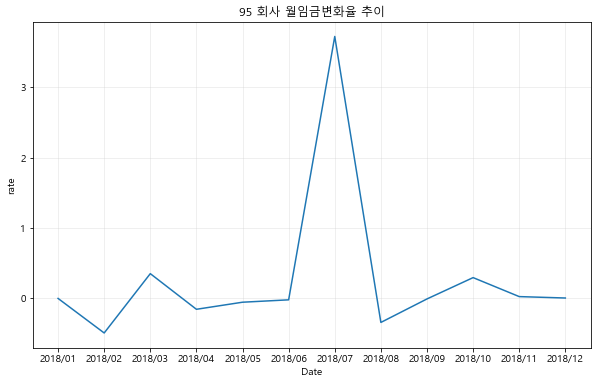

In [188]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data4.loc[data4['회사ID'] == 95], x='Date', y='rate')
plt.title('95 회사 월임금변화율 추이')
plt.grid(color='lightgrey', alpha=0.45)

## 연 임금변화율

In [191]:
data4.head()

,회사ID,Date,월연금보험료/월직원수,rate
0,63,2018/01,400715.55,0.00
1,63,2018/02,399578.55,-0.28
2,63,2018/03,399631.04,0.01
3,63,2018/04,399418.77,-0.05
4,63,2018/05,399540.56,0.03


In [195]:
data5 = data4.copy()
data5['year'] = pd.to_datetime(data4['Date']).dt.year
data5.head()

,회사ID,Date,월연금보험료/월직원수,rate,year
0,63,2018/01,400715.55,0.00,2018
1,63,2018/02,399578.55,-0.28,2018
2,63,2018/03,399631.04,0.01,2018
3,63,2018/04,399418.77,-0.05,2018
4,63,2018/05,399540.56,0.03,2018


In [211]:
data6 = data5.groupby(['회사ID', 'year'])['rate'].mean().to_frame()
data6.sample(5)

,,rate
회사ID,year,
408973,2015,-1.63
480496,2016,1.80
278592,2016,1.48
139414,2017,0.92
323481,2016,0.49


In [213]:
data6.reset_index(inplace=True)
data6.head()

,회사ID,year,rate
0,63,2018,0.28
1,95,2018,0.28
2,102,2018,-0.33
3,295,2018,-0.49
4,414,2018,0.59


# 기존 유니콘 기업 데이터 Load

* 11개 유니콘 기업에 대해 리서치하여 데이터셋 생성
* 크레딧잡, 중소기업현황정보시스템 활용

In [221]:
uni = pd.read_csv('./리서치/week1/유니콘 취합.csv', encoding='cp949')
print(uni.shape)
uni.head()

(550, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,지피클럽,22474017,2015,11,733104.00,8
1,지피클럽,22474017,2015,12,745068.00,7
2,지피클럽,48329929,2016,1,551118.00,7
3,지피클럽,48329929,2016,2,488133.00,7
4,지피클럽,48329929,2016,3,1073632.00,7


## 기존 유니콘 월 임금변화율

In [224]:
uni['월연금보험료/월직원수'] = uni['월별_연금보험료'] / uni['월별_직원수']
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
0,지피클럽,22474017,2015,11,733104.00,8,91638.00
1,지피클럽,22474017,2015,12,745068.00,7,106438.29
2,지피클럽,48329929,2016,1,551118.00,7,78731.14
3,지피클럽,48329929,2016,2,488133.00,7,69733.29
4,지피클럽,48329929,2016,3,1073632.00,7,153376.00


In [225]:
uni['Date'] = pd.to_datetime(uni['년도'].astype(str) + uni['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수,Date
0,지피클럽,22474017,2015,11,733104.00,8,91638.00,2015/11
1,지피클럽,22474017,2015,12,745068.00,7,106438.29,2015/12
2,지피클럽,48329929,2016,1,551118.00,7,78731.14,2016/01
3,지피클럽,48329929,2016,2,488133.00,7,69733.29,2016/02
4,지피클럽,48329929,2016,3,1073632.00,7,153376.00,2016/03


In [226]:
uni1 = uni.pivot_table(index=['회사ID', 'Date'], values='월연금보험료/월직원수')
uni1.head()

월연금보험료/월직원수
회사ID Date                
무신사  2015/11     95549.18
     2015/12     91139.71
     2016/01     98889.07
     2016/02     92049.25
     2016/03     93616.28

In [227]:
uni1['rate'] = uni1['월연금보험료/월직원수'].copy()

for i in range(len(uni1)):
    if i == 0:
        uni1.iloc[i, 1] = 0
    elif uni1.index[i][0] != uni1.index[i-1][0]:  # 다른 회사, 처음 시작 연도
        uni1.iloc[i, 1] = 0
    else:
        uni1.iloc[i, 1] = ((uni1.iloc[i, 0] - uni1.iloc[i-1, 0]) / uni1.iloc[i-1, 0]) * 100
        
uni1.head(10)

월연금보험료/월직원수  rate
회사ID Date                      
무신사  2015/11     95549.18  0.00
     2015/12     91139.71 -4.61
     2016/01     98889.07  8.50
     2016/02     92049.25 -6.92
     2016/03     93616.28  1.70
     2016/04     93616.28  0.00
     2016/05    101407.32  8.32
     2016/06     92291.04 -8.99
     2016/07     96327.54  4.37
     2016/08    104276.87  8.25

In [228]:
# 다른 회사로 시작할 때 rate 확인
uni1.reset_index(inplace=True)
uni1.head(20)

,회사ID,Date,월연금보험료/월직원수,rate
0,무신사,2015/11,95549.18,0.00
1,무신사,2015/12,91139.71,-4.61
2,무신사,2016/01,98889.07,8.50
3,무신사,2016/02,92049.25,-6.92
4,무신사,2016/03,93616.28,1.70
5,무신사,2016/04,93616.28,0.00
6,무신사,2016/05,101407.32,8.32
7,무신사,2016/06,92291.04,-8.99
8,무신사,2016/07,96327.54,4.37
9,무신사,2016/08,104276.87,8.25


## 기존 유니콘 연 임금변화율

In [229]:
uni2 = uni1.copy()
uni2['year'] = pd.to_datetime(uni2['Date']).dt.year
uni2.head()

,회사ID,Date,월연금보험료/월직원수,rate,year
0,무신사,2015/11,95549.18,0.00,2015
1,무신사,2015/12,91139.71,-4.61,2015
2,무신사,2016/01,98889.07,8.50,2016
3,무신사,2016/02,92049.25,-6.92,2016
4,무신사,2016/03,93616.28,1.70,2016


In [230]:
uni2 = uni2.groupby(['회사ID', 'year'])['rate'].mean().to_frame()
uni2.sample(5)

,,rate
회사ID,year,
크래프톤,2018,0.68
토스,2016,0.58
엘앤피코스메틱,2018,0.08
지피클럽,2019,1.06
야놀자,2017,0.66


In [231]:
uni2.reset_index(inplace=True)
uni2.head()

,회사ID,year,rate
0,무신사,2015,-2.31
1,무신사,2016,0.99
2,무신사,2017,1.28
3,무신사,2018,0.50
4,무신사,2019,1.44


# 연금보험료 & 직원수 & 임금변화율 소거 기준

**소거 기준** <br><br>
(1) 기존 유니콘 기업의 연평균 연금보험료의 평균의 최솟값 이상 <br>
(2) 기존 유니콘 기업의 연평균 직원수의 평균의 최솟값 이상 <br>
(3) 기존 유니콘 기업의 임금변화율의 평균의 최솟값 이상**(최소 2개년도 이상 데이터 존재하는 기업 (ex. 2016년 데이터만 존재하는 경우 drop)** <br><br>
* (1)와 (2)는 기존 유니콘 기업이 유니콘 기업으로 선정될 시점부터의 데이터로 확인<br>
* (3)는 유니콘 기업으로 성장하기까지의 변화의 패턴을 보기 위해 2015년 11월부터의 전체 데이터로 확인

In [236]:
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수,Date
0,지피클럽,22474017,2015,11,733104.00,8,91638.00,2015/11
1,지피클럽,22474017,2015,12,745068.00,7,106438.29,2015/12
2,지피클럽,48329929,2016,1,551118.00,7,78731.14,2016/01
3,지피클럽,48329929,2016,2,488133.00,7,69733.29,2016/02
4,지피클럽,48329929,2016,3,1073632.00,7,153376.00,2016/03


In [237]:
uni.describe()

,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
count,550.00,550.00,550.00,550.00,550.00,550.00
mean,536922275.17,2017.40,6.70,191932076.19,751.63,392760.40
std,1248234368.44,1.20,3.53,341714831.82,1699.01,567071.06
min,99100.00,2015.00,1.00,488133.00,7.00,69733.29
25%,54527868.00,2016.00,4.00,14319755.46,100.00,117927.61
50%,151000000.00,2017.00,7.00,30395216.40,209.50,136447.04
75%,396118457.00,2018.00,10.00,128292315.45,355.00,157497.40
max,7140720000.00,2019.00,12.00,1604615875.00,9032.00,1919766.15


* **월별 연금보험료**: 평균값 191932076.19, 표준편차 341714831.82, 최솟값 488133.0 <br>
* **월별 직원수**: 평균값 751.63, 표준편차 1699.01, 최솟값 7 <br>

### 유니콘 기업으로 선정된 연도별 데이터만 추출하여 소거기준 선정하기
* 쿠팡 (2014.05) : 90억달러
* 옐로모바일 (2014.11) : 40억달러
* L&P코스메틱 (2017.04) : 17.8억달러
* 크래프톤 (2018.08) : 50억달러
* 비바리퍼블리카(2018.12) : 22억달러
* 우아한형제들(2018.12) : 26억달러 - 딜리버리히어로에 인수되었지만...그래도 유니콘!
* 야놀자(2019.02) : 10억
* 지피클럽(2019.06) : 13.2억달러
* 무신사(2019.11) : 18.9억달러
* 에이프로젠(2019.12) : 10.4억달러
* 쏘카(2020.10)

## 기존 유니콘 기업의 연평균 연금보험료의 평균의 최솟값 이상

In [244]:
# 유니콘 기업 등록된 날로부터 '3달'전 시점부터 데이터 추출
uni_coupang = uni.loc[(uni['회사ID']=='쿠팡')]
uni_ym = uni.loc[(uni['회사ID']=='옐로모바일')]
uni_LP = uni.loc[(uni['회사ID']=='엘앤피코스메틱')&(uni['Date']>='2017/01')]
uni_kraft = uni.loc[(uni['회사ID']=='크래프톤')&(uni['Date']>='2018/05')]
uni_toss = uni.loc[(uni['회사ID']=='토스')&(uni['Date']>='2018/09')]
uni_woowa = uni.loc[(uni['회사ID']=='우아한형제들')&(uni['Date']>='2018/09')]
uni_ya = uni.loc[(uni['회사ID']=='야놀자')&(uni['Date']>='2019/09')]
uni_zipi = uni.loc[(uni['회사ID']=='지피클럽')&(uni['Date']>='2019/09')]
uni_musinsa = uni.loc[(uni['회사ID']=='무신사')&(uni['Date']>='2019/08')]
uni_apro = uni.loc[(uni['회사ID']=='에이프로젠')&(uni['Date']>='2019/09')]
uni_socar = uni.loc[(uni['회사ID']=='쏘카')&(uni['Date']>='2019/09')]
for i in [uni_coupang, uni_ym, uni_LP, uni_kraft, uni_toss, uni_woowa, uni_ya, uni_zipi, uni_musinsa, uni_apro, uni_socar]:
    print(len(i))

50
50
36
20
16
16
4
4
5
4
4


In [271]:
# 쿠팡 연금보험료 평균(년기준)
print(uni_coupang.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 옐로모바일 연금보험료 평균(년기준)
print(uni_ym.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 엘앤피코스메틱 연금보험료 평균(년기준)
print(uni_LP.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 크래프톤 연금보험료 평균(년기준)
print(uni_kraft.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 토스 연금보험료 평균(년기준)
print(uni_toss.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 우아한형제들 연금보험료 평균(년기준)
print(uni_woowa.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 야놀자 연금보험료 평균(년기준)
print(uni_ya.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 지피클럽 연금보험료 평균(년기준)
print(uni_zipi.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 무신사 연금보험료 평균(년기준)
print(uni_musinsa.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 에이프로젠 연금보험료 평균(년기준)
print(uni_apro.pivot_table(index=['년도'], values='월별_연금보험료').mean())
# 쏘카 연금보험료 평균(년기준)
print(uni_socar.pivot_table(index=['년도'], values='월별_연금보험료').mean())

월별_연금보험료   802979480.20
dtype: float64
월별_연금보험료   8955012.78
dtype: float64
월별_연금보험료   31151739.14
dtype: float64
월별_연금보험료   101855417.38
dtype: float64
월별_연금보험료   372086321.61
dtype: float64
월별_연금보험료   1287591532.71
dtype: float64
월별_연금보험료   117433858.15
dtype: float64
월별_연금보험료   14531408.50
dtype: float64
월별_연금보험료   45236347.80
dtype: float64
월별_연금보험료   20948697.58
dtype: float64
월별_연금보험료   49333367.30
dtype: float64


### 연금보험료 평균(년기준)의 최솟값: 8955012.75

## 기존 유니콘 기업의 연평균 직원수의 평균의 최솟값 이상

In [276]:
# 쿠팡 직원수 평균(년기준)
print(uni_coupang.pivot_table(index=['년도'], values='월별_직원수').mean())
# 옐로모바일 직원수 평균(년기준)
print(uni_ym.pivot_table(index=['년도'], values='월별_직원수').mean())
# 엘앤피코스메틱 월연금보험료/월직원수 평균
print(uni_LP.pivot_table(index=['년도'], values='월별_직원수').mean())
# 크래프톤 직원수 평균(년기준)
print(uni_kraft.pivot_table(index=['년도'], values='월별_직원수').mean())
# 토스 직원수 평균(년기준)
print(uni_toss.pivot_table(index=['년도'], values='월별_직원수').mean())
# 우아한형제들 직원수 평균(년기준)
print(uni_woowa.pivot_table(index=['년도'], values='월별_직원수').mean())
# 야놀자 직원수 평균(년기준)
print(uni_ya.pivot_table(index=['년도'], values='월별_직원수').mean())
# 지피클럽 직원수 평균(년기준)
print(uni_zipi.pivot_table(index=['년도'], values='월별_직원수').mean())
# 무신사 직원수 평균(년기준)
print(uni_musinsa.pivot_table(index=['년도'], values='월별_직원수').mean())
# 에이프로젠 직원수 평균(년기준)
print(uni_apro.pivot_table(index=['년도'], values='월별_직원수').mean())
# 쏘카 직원수 평균(년기준)
print(uni_socar.pivot_table(index=['년도'], values='월별_직원수').mean())

월별_직원수   5902.50
dtype: float64
월별_직원수   60.92
dtype: float64
월별_직원수   221.58
dtype: float64
월별_직원수   606.27
dtype: float64
월별_직원수   201.83
dtype: float64
월별_직원수   756.83
dtype: float64
월별_직원수   730.25
dtype: float64
월별_직원수   114.00
dtype: float64
월별_직원수   325.80
dtype: float64
월별_직원수   175.00
dtype: float64
월별_직원수   366.50
dtype: float64


### 직원수 평균(년기준)의 최솟값: 60.92

## 기존 유니콘 기업의 임금변화율의 평균의 최솟값 이상

In [296]:
uni2.head()

,회사ID,year,rate
0,무신사,2015,-2.31
1,무신사,2016,0.99
2,무신사,2017,1.28
3,무신사,2018,0.50
4,무신사,2019,1.44


In [305]:
uni_mean_rate = uni2.groupby(['회사ID'])['rate'].mean().to_frame().\
sort_values(by='rate', ascending=False).reset_index()
uni_mean_rate.style.background_gradient(cmap='Blues')

,회사ID,rate
0,지피클럽,3.804079
1,토스,2.908803
2,쏘카,1.469977
3,야놀자,0.500338
4,엘앤피코스메틱,0.452805
5,우아한형제들,0.434848
6,에이프로젠,0.408581
7,무신사,0.381894
8,크래프톤,0.335664
9,쿠팡,0.070194


In [307]:
uni_mean_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,11.00,0.96,1.27,-0.20,0.36,0.43,0.99,3.80


### 연평균 임금변화율의 최솟값이 **마이너스**이므로, 1사분위수(25%) 값인 0.36 채택

### 소거기준 정리
* 연금보험료 평균(년기준)의 최솟값이 8955012.75 이상인 경우만 남김
* 직원수 평균(년기준)의 최솟값이 60.92 이상인 경우만 남김
* 연평균 임금변화율의 평균값이 기존 유니콘 기업들의 연평균 임금변화율의 1사분위수(25%) 값인 0.36 이상인 경우(최소 2개년도 이상)만 남김

# 소거 기준 적용한 상위 20개 기업 선정

## 연금보험료 평균(년기준) 최솟값이 8955012.75 이상인 경우

In [336]:
data_yearly_premium = data2.pivot_table(index='회사ID', values='월별_연금보험료', aggfunc=np.mean).reset_index()
data_yearly_premium.loc[data_yearly_premium['월별_연금보험료']>=8955012.75].sort_values(by='월별_연금보험료',
                                                                                ascending=False)
data_yearly_premium_top20 = data_yearly_premium.loc[data_yearly_premium['월별_연금보험료']>=8955012.75].sort_values(by='월별_연금보험료',
                                                                                ascending=False).head(20)
data_yearly_premium_top20

,회사ID,월별_연금보험료
1827,227414,869685058.42
1828,227415,852418842.63
4024,419945,838814933.33
464,126516,554900657.69
465,126521,532062027.89
4488,469458,500674027.20
4180,439902,489029400.00
0,63,410128228.33
466,126538,396866791.05
4025,419977,391094838.33


## 직원수 평균(년기준)의 최솟값이 60.92 이상인 경우

In [337]:
data_yearly_employee = data2.pivot_table(index='회사ID', values='월별_직원수', aggfunc=np.mean).reset_index()
data_yearly_employee.loc[data_yearly_employee['월별_직원수']>=60.92].sort_values(by='월별_직원수',
                                                                           ascending=False)
data_yearly_employee_top20 = data_yearly_employee.loc[data_yearly_employee['월별_직원수']>=60.92].sort_values(by='월별_직원수',
                                                                           ascending=False)
data_yearly_employee_top20

,회사ID,월별_직원수
4488,469458,2747.44
4024,419945,2744.48
1827,227414,2324.05
1828,227415,2298.42
4489,469473,2163.26
4180,439902,1816.50
2709,294337,1736.53
465,126521,1526.95
4844,547586,1513.25
464,126516,1511.54


## 연평균 임금변화율의 평균값이 0.36 이상인 경우(최소 2개년도 이상)

In [347]:
print(data6.shape)
data6.head()

(10109, 3)


,회사ID,year,rate
0,63,2018,0.28
1,95,2018,0.28
2,102,2018,-0.33
3,295,2018,-0.49
4,414,2018,0.59


In [355]:
# 중복값 확인(2개년도 이상 데이터 존재하는 기업 확인하기 위함)
print(len(data6.duplicated(['회사ID']).loc[data6.duplicated(['회사ID'])]))
duplicate_data = data6.duplicated(['회사ID']).loc[data6.duplicated(['회사ID'])].index.tolist()
duplicate_data[:10]

5111


[53, 54, 55, 56, 165, 223, 224, 225, 411, 412]

In [362]:
data6_duplicate_data = data6.loc[data6.index.isin(duplicate_data)]
print(data6_duplicate_data.shape)
data6_duplicate_data.head()

(5111, 3)


,회사ID,year,rate
53,14271,2016,0.63
54,14271,2017,-1.23
55,14271,2018,-0.40
56,14271,2019,0.78
165,44851,2018,-0.75


In [365]:
len(data6_duplicate_data['회사ID'].value_counts())

2589

* **2개년도 이상 데이터 존재하는 기업 2589곳 추출**

In [368]:
data6_duplicate_data_rate = data6_duplicate_data.groupby(['회사ID'])['rate'].mean().to_frame().reset_index().sort_values(by='rate',
                                                                                          ascending=False)
data6_duplicate_data_rate_top20 = data6_duplicate_data_rate.loc[data6_duplicate_data_rate['rate'] >= 0.36].head(20)
data6_duplicate_data_rate_top20

,회사ID,rate
2505,478999,30.35
22,124581,22.72
2454,472629,18.49
2584,515562,17.93
2411,462139,12.56
1364,269034,11.50
356,146381,11.09
2578,513441,11.08
2526,485596,10.28
1893,362017,9.95


# 각 기준 상위 20개 기업 데이터셋 및 최종 선정

In [369]:
display(data_yearly_premium_top20.head(10))
display(data_yearly_employee_top20.head(10))
display(data6_duplicate_data_rate_top20.head(10))

,회사ID,월별_연금보험료
1827,227414,869685058.42
1828,227415,852418842.63
4024,419945,838814933.33
464,126516,554900657.69
465,126521,532062027.89
4488,469458,500674027.20
4180,439902,489029400.00
0,63,410128228.33
466,126538,396866791.05
4025,419977,391094838.33


,회사ID,월별_직원수
4488,469458,2747.44
4024,419945,2744.48
1827,227414,2324.05
1828,227415,2298.42
4489,469473,2163.26
4180,439902,1816.50
2709,294337,1736.53
465,126521,1526.95
4844,547586,1513.25
464,126516,1511.54


,회사ID,rate
2505,478999,30.35
22,124581,22.72
2454,472629,18.49
2584,515562,17.93
2411,462139,12.56
1364,269034,11.50
356,146381,11.09
2578,513441,11.08
2526,485596,10.28
1893,362017,9.95


* 겹치는 기업이 잘 보이지 않으므로 상위 20개가 아닌 전체 데이터로 확인

In [393]:
data_yearly_premium_total = data_yearly_premium.loc[data_yearly_premium['월별_연금보험료']>=8955012.75].sort_values(by='월별_연금보험료', ascending=False)
print(data_yearly_premium_total.shape)
data_yearly_premium_total.head()

(588, 2)


,회사ID,월별_연금보험료
1827,227414,869685058.42
1828,227415,852418842.63
4024,419945,838814933.33
464,126516,554900657.69
465,126521,532062027.89


In [392]:
data_yearly_employee_total = data_yearly_employee.loc[data_yearly_employee['월별_직원수']>=60.92].sort_values(by='월별_직원수', ascending=False)
print(data_yearly_employee_total.shape)
data_yearly_employee_total.head()

(361, 2)


,회사ID,월별_직원수
4488,469458,2747.44
4024,419945,2744.48
1827,227414,2324.05
1828,227415,2298.42
4489,469473,2163.26


In [391]:
data6_duplicate_data_rate_total = data6_duplicate_data_rate.loc[data6_duplicate_data_rate['rate'] >= 0.36].sort_values(by='rate', ascending=False)
print(data6_duplicate_data_rate_total.shape)
data6_duplicate_data_rate_total.head()

(1567, 2)


,회사ID,rate
2505,478999,30.35
22,124581,22.72
2454,472629,18.49
2584,515562,17.93
2411,462139,12.56


In [394]:
uni_selected = pd.DataFrame(data={
    '연금보험료(내림차순)':data_yearly_premium_total.iloc[:350, 0].tolist(),
    '직원수(내림차순)':data_yearly_employee_total.iloc[:350, 0].tolist(),
    '임금변화율(내림차순)':data6_duplicate_data_rate_total.iloc[:350, 0].tolist()
})
print(uni_selected.shape)
uni_selected.head()

(350, 3)


,연금보험료(내림차순),직원수(내림차순),임금변화율(내림차순)
0,227414,469458,478999
1,227415,419945,124581
2,419945,227414,472629
3,126516,227415,515562
4,126521,469473,462139


In [398]:
uni_selected.head(50)

,연금보험료(내림차순),직원수(내림차순),임금변화율(내림차순)
0,227414,469458,478999
1,227415,419945,124581
2,419945,227414,472629
3,126516,227415,515562
4,126521,469473,462139
5,469458,439902,269034
6,439902,294337,146381
7,63,126521,513441
8,126538,547586,485596
9,419977,126516,362017


--> 이렇게 할 경우, 연금보험료와 직원수 간에는 중복되는 회사들이 존재하지만, 임금변화율 컬럼에서는 중복되는 값이 매우 희박함 <br><br>
why? 임금변화율은 최소 2년 이상의 데이터를 갖고 있는 데이터만 존재하기 때문 <br><br>
## **분석을 진행하며 고민하게 된 부분**<br>
### 임금변화율이 과연 유의미한 변수인가?<br>
* 기존 유니콘들의 임금변화율의 평균값은 0.96%, 중위수 0.43%였음. 이 수치는 제공받은 다수의 기업들의 임금변화율에 비해 독보적인 수치가 결코 아님 <br>
* 임금변화율이 유의미하지 않은 변수라면, 연금보험료와 직원수의 규모를 내림차순으로 설정하여 상위 rank에서 중복되는 기업들을 추리는 것이 방법일 것임 <br>
* 만약, 임금변화율을 유니콘 기업을 찾는 데에 꼭 활용해야 한다면, 연금보험료와 직원수 뿐만 아니라 다른 모든 변수들 역시 '최소 2개년 이상 데이터가 있는 경우'로 필터링을 거쳐야 함

## 연금보험료 & 직원수를 통해 선정한 유니콘 기업 리스트

* 227414(연금보험료 1위, 직원수 3위)
* 227415(연금보험료 2위, 직원수 4위)
* 419945(연금보험료 3위, 직원수 2위)
* 126516(연금보험료 4위, 직원수 10위)
* 126521(연금보험료 5위, 직원수 8위)
* 469458(연금보험료 6위, 직원수 1위)
* 439902(연금보험료 7위, 직원수 6위)
* 126538(연금보험료 9위, 직원수 13위)
* 419977(연금보험료 10위, 직원수 12위)
* 547586(연금보험료 11위, 직원수 9위)

In [401]:
## 연금보험료와 직원수도 <최소 2년 이상 데이터를 보유한 기업으로 필터링 후 다시 진행>
### 임금변화율을 건드릴 수 없는 이유: 비율이기 때문에 최소 2개년 이상 데이터가 필요하기 때문